# Computational Social Science Project #3 

**Enter your Name:** Maria Luciani

*Semester:* Fall 2024

## 1. Introduction

### Load data 

In [1]:
#
# load libraries
# -----------
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline
from sklearn.preprocessing import LabelBinarizer

# There are a few warnings that will appear that will not affect your analysis. Run this code to ignore. 
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Make sure to import other libraries that will be necessary for training models!

In [2]:
#
# read in "Inspections Data 2011-2013" csv data
# -----------
chicago_inspections_2011_to_2013 = pd.read_csv("data/Chicago Inspections 2011-2013.csv", 
                                              low_memory=False)

#
# read in  "Inspections Data 2014_updated" csv data
# -----------
chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014_updated.csv",  # be sure to use the "updated" data here
                                      low_memory=False)

In [3]:
# look at the inspections data
chicago_inspections_2011_to_2013.head()

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Results,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pass_flag,fail_flag,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
0,269961,2013-01-31,SEVEN STAR,SEVEN STAR,30790,Grocery Store,Risk 3 (Low),3352 N BROADWAY,CHICAGO,IL,60657.0,Canvass,Pass,41.943359,-87.644999,"(41.943359344775146, -87.64499875300952)",Other,0,0,2,1,0,0,0,0,0,2.0,1,30790-20110416,2081412.0,63759.0,VIRGINIA DELA ROSA,SEVEN STAR,3352 N BROADWAY 1,CHICAGO,IL,60657.0,44.0,33.0,44-33,19.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,30790.0,RENEW,2011-04-16,2013-04-15,AAI,41.943359,-87.644999,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
1,507211,2011-10-18,PANERA BREAD,PANERA BREAD,1475890,Restaurant,Risk 1 (High),6059 N LINCOLN AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.991919,-87.709631,"(41.99191947239194, -87.70963133440333)",Restaurant,0,0,3,1,0,0,0,0,0,2.0,1,1475890-20110416,2081695.0,207283.0,"PANERA, LLC",PANERA BREAD,6059 N LINCOLN AVE C,CHICAGO,IL,60659.0,50.0,23.0,50-23,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1475890.0,RENEW,2011-04-16,2013-04-15,AAI,41.991919,-87.709631,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
2,507212,2011-10-18,LITTLE QUIAPO RESTAURANT,LITTLE QUIAPO RESTAURANT,1740130,Restaurant,Risk 1 (High),6259 N MCCORMICK RD,CHICAGO,IL,60659.0,Canvass,Fail,41.995632,-87.712707,"(41.99563177556418, -87.71270678169132)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1740130-20110216,2070145.0,3107.0,ENELITA GARCIA,LITTLE QUIAPO RESTAURANT,6259 N MCCORMICK RD,CHICAGO,IL,60659.0,50.0,25.0,50-25,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1740130.0,RENEW,2011-02-16,2013-02-15,AAI,41.995632,-87.712707,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
3,507216,2011-10-19,SERGIO'S TAQUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA,1447363,Restaurant,Risk 1 (High),3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.982933,-87.710982,"(41.982933189164974, -87.71098225381141)",Restaurant,0,0,6,1,0,0,0,0,0,2.0,1,1447363-20110216,2071895.0,270993.0,SERGIO'S TAZUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA INC.,3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,39.0,48.0,39-48,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1447363.0,RENEW,2011-02-16,2013-02-15,AAI,41.982933,-87.710982,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
4,507219,2011-10-20,TARGET STORE # T-2079,TARGET,1679459,Restaurant,Risk 2 (Medium),2112 W PETERSON AVE,CHICAGO,IL,60659.0,Canvass,Fail,41.990729,-87.682979,"(41.99072921796059, -87.68297945359863)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1679459-20100216,2009972.0,15538.0,TARGET CORPORATION,TARGET STORE # T-2079,2112 W PETERSON AVE,CHICAGO,IL,60659.0,40.0,18.0,40-18,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1679459.0,RENEW,

In [4]:
# list column names
chicago_inspections_2011_to_2013.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [5]:
# drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2011_to_2013.drop(columns = ['AKA_Name', 
                                                 'License',
                                                 'Address',
                                                 'City',
                                                 'State',
                                                 'Zip',
                                                 'Latitude',
                                                 'Longitude',
                                                 'Location',
                                                 'ID',
                                                 'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                 'ACCOUNT_NUMBER',
                                                 'LEGAL_NAME',
                                                 'DOING_BUSINESS_AS_NAME',
                                                 'ADDRESS',
                                                 'CITY',
                                                 'STATE',
                                                 'ZIP_CODE',
                                                 'WARD',
                                                 'PRECINCT',
                                                 'LICENSE_CODE',
                                                 'BUSINESS_ACTIVITY_ID',
                                                 'BUSINESS_ACTIVITY',
                                                 'LICENSE_NUMBER',
                                                 'LATITUDE',
                                                 'LONGITUDE',
                                                 'pass_flag',
                                                 'fail_flag'],
                                     inplace = True)

# set index
chicago_inspections_2011_to_2013.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

I'm noticing several features that seem weather-related (e.g., temperature, humidity, wind speed) which should possibly be removed. However, we weren't given any kind of codebook so I don't know what they really mean. It's possible they're measures of conditions on the outdoor patio of a restaurant or something like that which could be a violation if they're too extreme? Keeping them in since there's no way to really know if they're relevant or not.

In [6]:
# convert the inspection date to a datetime format
chicago_inspections_2011_to_2013['Inspection_Date'] = pd.to_datetime(chicago_inspections_2011_to_2013['Inspection_Date'])  

### Visualization

Let's visualize what inspections look like over time.

<Axes: title={'center': 'Inspections by Month and Year'}, xlabel='Inspection_MonthYear'>

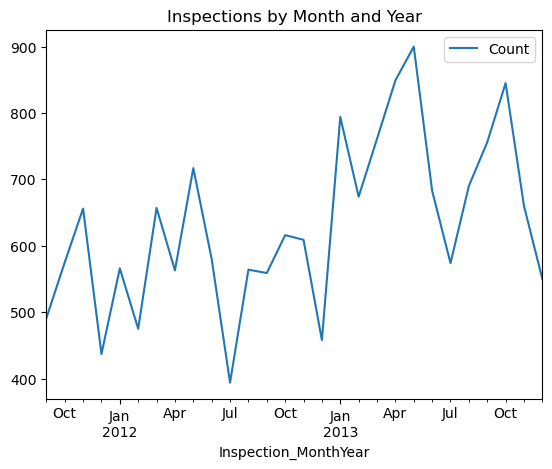

In [7]:
# visualize inspections over time
# -----------
chicago_inspections_2011_to_2013['Inspection_MonthYear'] = chicago_inspections_2011_to_2013['Inspection_Date'].dt.to_period('M')
counts_by_day = chicago_inspections_2011_to_2013.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type': 'Count'})['Count'].reset_index()
counts_by_day.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day.plot(title = "Inspections by Month and Year") 

Let's visualize what the distribution of results looks like.

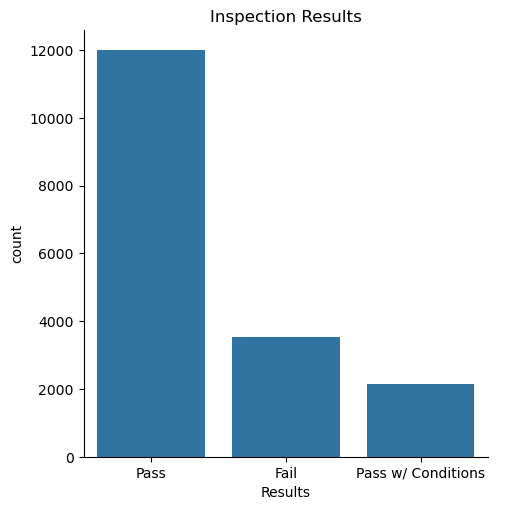

In [8]:
# view inspection results
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

What if we separate results by facility type?

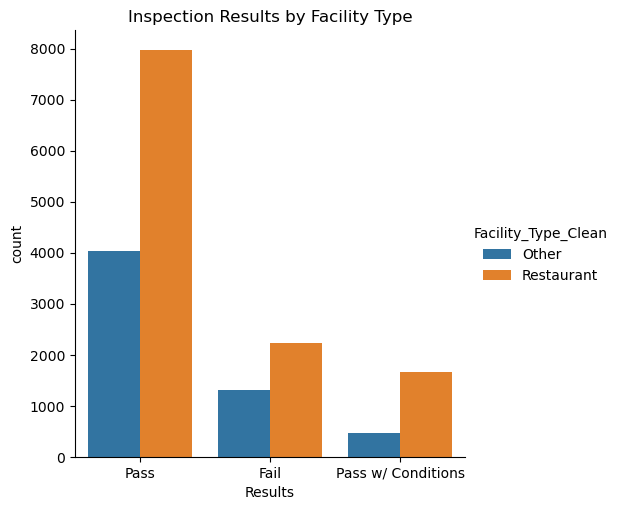

In [9]:
# view inspection results by facility type (restaurant or not)
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
            x = "Results",
            kind = "count",
            hue = 'Facility_Type_Clean')

plt.title("Inspection Results by Facility Type")
plt.show();

## 2. Data Preprocessing and Cleaning

In [10]:
# drop datetime info
# -----------
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop(['Inspection_Date',
                                                                                   'minDate',
                                                                                   'maxDate',
                                                                                   'Inspection_MonthYear'],
                                                                                  axis = 1)

In [112]:
# process target 
# -----------
y = chicago_inspections_2011_to_2013['Results']

# decide if you want to binarize the outcome variable 
# -----------
# comment out the following lines of code if you don't want to binarize the target variable
y = y.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y = lb_style.fit_transform(y)

# recode 0s and 1s so 1s are "Fail"
y = np.where(y == 1, 0 ,1)


# process features
# -----------

# create feature dataset
X = chicago_inspections_2011_to_2013.drop(columns = ['Results', 
                                                     'Facility_Type', 
                                                     'LICENSE_DESCRIPTION', 
                                                     'WARD_PRECINCT'])


# get dummies
X = pd.get_dummies(X)

In [113]:
# view feature datset
X.head()

,,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,POLICE_DISTRICT,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Risk_Risk 1 (High),Risk_Risk 2 (Medium),Risk_Risk 3 (Low),Inspection_Type_Canvass,Facility_Type_Clean_Other,Facility_Type_Clean_Restaurant,APPLICATION_TYPE_C_EXPA,APPLICATION_TYPE_C_LOC,APPLICATION_TYPE_ISSUE,APPLICATION_TYPE_RENEW
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
269961,SEVEN STAR,0,0,2,0,0,0,0,2.0,1,19.0,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0,False,False,True,True,True,False,False,False,False,True
507211,PANERA BREAD,0,0,3,0,0,0,0,2.0,1,24.0,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0,True,False,False,True,False,True,False,False,False,True
507212,LITTLE QUIAPO RESTAURANT,0,2,6,0,0,0,0,2.0,1,17.0,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0,True,False,False,True,False,True,False,False,False,True
507216,SERGIO'S TAQUERIA PIZZA INC.,0,0,6,0,0,0,0,2.0,1,17.0,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0,True,False,False,True,False,True,False,False,False,True
507219,TARGET STORE # T-2079,0,2,6,0,0,0,0,2.0,1,24.0,5.290411,0,0,1,0,0,1,0,0,0,0,0,0,0.009987,52.730000,16.266667,0.690000,9.530785,3.401567,2.126788,0,False,True,False,True,False,True,False,False,False,True


## 3. Fit Models

Now choose 3 different machine learning techniques and apply them below. Choose from the algorithms we have used in lab (e.g., logistic regression, random forests, `AdaBoost()`, `xgboost()`, `VotingClassifer()`, or `BART`). 

Detail the basic logic and assumptions underlying each model, its pros/cons, and why it is a plausible choice for this problem. Also, be sure to do the following:

1. Import the appropriate library from sklearn
2. Set up a hyperparameter grid (check out our previous labs to see how to do this)
3. Find the best hyperparameters, and then fit your model (using either train/validation splits or cross-validation)

### Model 1: Logistic Regression
Logistic regression predicts a binary outcome (0-1, or in this case pass-fail) based on categorical or continuous features. Unlike linear regression, which fits the data to a *linear* model, logistic regression uses an s-shaped model with asymptotes of 0 and 1 to ensure predicted outcomes are never more than 1 or less than 0. Also, unlike linear regression which uses least squares optimization, logistic regression optimizes based on maximum likelihood. This basically means that the algorithm tries to find an output with the highest possible likelihood of matching (or getting close to) the observed value for each observation. Logistic regression could make sense for our data given that we have a binary outcome (pass/fail).
* Pros: Parsimony and simplicity: If the underlying distribution of our data is appropriate for logistic regression and the predictors are relatively uncorrelated, logistic regression could offer a good fit with much more simplicity and transparency than ML methods. The outputs are also much more interpretable, with coefficients for each predictor giving us a sense of their influence on the final prediction.
* Cons: If those assumptions (appropriate distribution and uncorrelated predictors) aren't met, it won't be a very good model. We might expect other models to outperform logistic regression in this case due to the complicated and likely covarying predictors we have.

#### Model fitting and hyperparameter tuning

In [13]:
# load libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [14]:
# set up train/validate split
X_train, X_validate, y_train, y_validate = train_test_split(X, 
                                                            y, 
                                                            train_size = .75, 
                                                            test_size = .25, 
                                                            stratify = y)

In [15]:
# create the initial logistic model
logit_reg = LogisticRegression()

# fit the model
logit_model = logit_reg.fit(X_train, y_train.ravel())

# predict on the validation data
y_pred = logit_model.predict(X_validate)

Now, we'll do hyperparameter tuning to improve our logistic model's accuracy:

In [16]:
# Find best hyperparameters

# import libraries
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore')
from sklearn.metrics import accuracy_score

# set parameters
param_grid = {'penalty': ['l1', 'l2', 'elasticnet'],
             'C': np.arange(.1, 1, .1),
             'fit_intercept': [True, False],
             'solver': ['liblinear', 'saga']}


# execute the grid search and fit to training data
logit_grid = GridSearchCV(logit_model, 
                          param_grid, 
                          cv=3)
logit_grid.fit(X_train, 
               y_train)

# choose best performing model
best_index = np.argmax(logit_grid.cv_results_["mean_test_score"])
best_logit_pred = logit_grid.best_estimator_.predict(X_validate)

# print results
print(logit_grid.cv_results_["params"][best_index])
print('Validation Accuracy', accuracy_score(best_logit_pred, y_validate))

{'C': 0.1, 'fit_intercept': True, 'penalty': 'elasticnet', 'solver': 'liblinear'}
Validation Accuracy 0.9224137931034483


Unfortunately, the hyperparameters that are "best" are incompatible with one another: The penalty *elasticnet* can't be used with the solver *liblinear.* So, I'm going to MacGyver a solution that is probably sketchy but hopefully the underlying thinking makes sense.

First, I'm going to do an additional hyperparameter search to see how the model does if I use the *saga* solver instead, and keep *elasticnet* as my penalty. I'll need to search for the optimal l1_ratio because this is a required parameter when using elasticnet.

In [17]:
# set parameters
param_grid = {'l1_ratio': np.arange(0, 1, .1)}


# execute the grid search and fit to training data
logit_grid = GridSearchCV(LogisticRegression(C = 0.1, fit_intercept = True, penalty = 'elasticnet', solver = 'saga'),
                          param_grid, 
                          cv=3)
logit_grid.fit(X_train, 
               y_train)

# choose best performing model
best_index = np.argmax(logit_grid.cv_results_["mean_test_score"])
best_logit_pred = logit_grid.best_estimator_.predict(X_validate)

# print results
print(logit_grid.cv_results_["params"][best_index])
print('Validation Accuracy', accuracy_score(best_logit_pred, y_validate))

{'l1_ratio': 0.0}
Validation Accuracy 0.867816091954023


Okay, if I choose these parameters, I should use 0.0 as my l1_ratio, and accuracy in the validation set is about .87.

Now, I'm going to do an additional hyperparameter search in which I set the solver to *liblinear* and search for the optimal penalty and l1_ratio under these conditions:

In [18]:
# set parameters
param_grid = {'l1_ratio': np.arange(0, 1, .1),
             'penalty': ['l1', 'l2', 'elasticnet']}


# execute the grid search and fit to training data
logit_grid = GridSearchCV(LogisticRegression(C = 0.1, fit_intercept = True, solver = 'liblinear'),
                          param_grid, 
                          cv=3)
logit_grid.fit(X_train, 
               y_train)

# choose best performing model
best_index = np.argmax(logit_grid.cv_results_["mean_test_score"])
best_logit_pred = logit_grid.best_estimator_.predict(X_validate)

# print results
print(logit_grid.cv_results_["params"][best_index])
print('Validation Accuracy', accuracy_score(best_logit_pred, y_validate))

{'l1_ratio': 0.0, 'penalty': 'elasticnet'}
Validation Accuracy 0.920846394984326


Looks like the penalty is still coming up as *elasticnet* AND the l1_ratio is optimal at 0.0. I know from the documentation for this library that an l1_ratio of 0 is the same as a penalty of l2. SO, since I keep getting optimal results with 0.0 (l2) and liblinear does much better than saga, I'll plan to resolve my problem by using *liblinear* with the *l2* penalty. Let's see how this looks below.

In [19]:
# update logistic model based on optimal hyperparameters

# create the updated logistic model
logit_reg = LogisticRegression(C = 0.1, fit_intercept = True, penalty = 'l2', solver = 'liblinear')

# fit the model
logit_model = logit_reg.fit(X_train, y_train.ravel())

# predict on the validation data
y_pred = logit_model.predict(X_validate)

### Model 2: Random Forests
Random forests is an ensemble method that is based on decision trees. It is a *bagging* method, which means that multiple decision trees are grown independently of one another based on a bootstrapped subset of the data. Each tree will branch multiple times based on values of influential predictors, leading to an assignment of 0 or 1 in this case (pass or fail) based on combinations of features. In bagging methods such as these, many trees are grown to reduce variability, with each tree "voting" on 0 or 1 for the final classification. However, bagging can fail when there are particular features that are much more influential than others or many features that are inter-correlated. In these cases, each tree can tend to be somewhat similar and not really explore how each feature contributes to the outcome. Random forests address this problem by taking a random selection of features to be used at each split in each tree, effectively decorrelating the trees. This means that splits can be made for less influential variables, or intercorrelated ones, where they might otherwise be outweighed. Random selections of features and random selection of observations within each tree allows a more robust exploration of the model space. This could be a good solution for our current application because we have multiple predictors that likely interact in complex ways (so, not a good job for logistic regression) and are likely correlated with one another.
* Pros: Allows full exploration of model space compared to plain bagging, and also provides a more accurate and prediction (with less variance) than single trees.
* Cons: Less interpetable than logistic regression or single decision trees. Also there's potential for overfitting, as is often the case for tree-based models.

#### Model training using cross-validation

In [20]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [44]:
# initialize a random forest classifier
# ----------
rf_classifier = RandomForestClassifier(
                       # specify parameters
                       n_estimators=100,              
                       criterion='gini',              
                       max_depth=None,                
                       min_samples_split=2,           
                       min_samples_leaf=1,            
                       min_weight_fraction_leaf=0.0,  
                       max_features=None,             
                       max_leaf_nodes=None,           
                       min_impurity_decrease=1e-07,   
                       random_state = 10)             

In [22]:

# specify cross-validation
# ----------
scores = cross_val_score(rf_classifier, 
                         X, 
                         y.ravel(), # Some algorithms will expect you to ravel the target
                         cv=5)

In [23]:
# calculate the average score across models
# ----------
scores.mean()

0.9216250168196589

Our random forest model with default settings gives us an average score of 0.922 -- this is already pretty good. However, we may be able to improve it by tuning our hyperparameters. Because using grid search was way too computationally intensive for me when I gave it a try, I'm using randomized search to identify close-to-optimal values for my hyperparameters below.

#### *NOTE: The code below takes a few minutes to run. I've summarized the output below if you don't want to run it!*

In [ ]:
# set parameters
param_grid = { 
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['sqrt', 'log2', None],
    'max_depth' : [5, 10, 20, 30, 40],
    'criterion' :['gini', 'entropy'],
    'min_samples_split' : [5, 10, 15, 20],
    'min_samples_leaf': [2, 4, 6, 8, 10]
}
      
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf_classifier, 
                               param_distributions = param_grid,
                               n_iter = 100, 
                               cv = 3, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1)
# Fit the random search model
rf_random.fit(X, y.ravel())

# choose best performing model
best_index = np.argmax(rf_random.cv_results_["mean_test_score"])

# print results
print(rf_random.cv_results_["params"][best_index])
print('Validation Accuracy', rf_random.best_score_)

Hyperparameter tuning has slightly improved model performance: Our new validation accuracy is 0.924. Let's re-fit the model using our new hyperparameters:
'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 10, 'max_features': None, 'max_depth': 10, 'criterion': 'entropy'}

In [194]:
# initialize an updated random forest classifier
# ----------
rf_classifier = RandomForestClassifier(
                       # specify parameters
                       n_estimators=400,            
                       criterion='entropy',         
                       max_depth=10,                
                       min_samples_split=5,         
                       min_samples_leaf=10,         
                       min_weight_fraction_leaf=0.0,
                       max_features=None,           
                       max_leaf_nodes=None,         
                       min_impurity_decrease=1e-07, 
                       random_state = 10)      

# fit the updated classifier to the data
rf_model = rf_classifier.fit(X,y)

In [25]:

# specify cross-validation
# ----------
scores = cross_val_score(rf_classifier, 
                         X, 
                         y.ravel(), # Some algorithms will expect you to ravel the target
                         cv=5)

In [26]:
# calculate the average score across models
# ----------
scores.mean()

0.9255437894355696

Our final accuracy is better than before, at 0.926.

###  Model 3: XGBoost
XGBoost is another ensemble method taking advantage of multiple decision trees, but unlike Random Forests it is a "boosting" method. This means that rather than generating several independent trees and averaging their outputs, this model generates several *successive* trees, each fit to the residuals of the prior tree. This allows each successive tree to fine-tune the model in areas where it currently performs poorly, increasing accuracy accross the model space. Each tree is considered a "weak learner" because it typically isn't very deep, and only adds a little information to the model. The rate of learning can be controlled with a shrinkage parameter lambda. This can help avoid overfitting. XGBoost in particular (compared to AdaBoost, for example) uses a gradient descent function to improve fit (smallest possible loss function). 
* Pros: Works well on large and/or sparse datasets, since it can handle missing data. Also has an efficient regularization technique in which it finds the optimal tree depth at each iteration, rather than having to cross-validate different depth values. Typically performs pretty well. Combines techniques from tree-based learning with others (like ridge/lasso with the lambda parameter) to optimize.
* Cons: Computationally intensive, especially with the need to tune hyperparameters. Also hard to explain and interpret results compared to more straightforward methods like regression or decision trees.

#### Model training using cross-validation

In [49]:
!pip install xgboost
import xgboost as xgb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 5.8 MB/s eta 0:00:00a 0:00:01


In [50]:
# initialize an XGBoost classifier
# ----------
xgb_classifier = xgb.XGBClassifier(random_state=10)


# define the scoring metrics
scoring = {
          'accuracy': make_scorer(accuracy_score),
          'recall': make_scorer(recall_score),
          'precision': make_scorer(precision_score),
          'f1': make_scorer(f1_score)
          }


# perform cross-validation with 5-fold and return the trained estimators
cv_results = cross_validate(xgb_classifier,        # specify estimator 
                            X,                     # specify features
                            y.ravel(),             # specify outcome, and use ravel
                            cv=5,                  # specify 5-fold cross validation
                            return_estimator=True, # return the estimators fitted at each split
                            scoring=scoring)       # which scoring metrics to return (the whole list in this case)
 
# print the results for accuracy, recall, precision, and F1 score
for metric in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
    scores = cv_results[metric]
    print(f"{metric[5:]}: {scores.mean():.3f}")

accuracy: 0.918
recall: 0.835
precision: 0.777
f1: 0.805


Our XGBoost model with default settings gives an accuracy of 0.918. Again, not bad. We can try to do some tuning of hyperparameters to improve accuracy further. Let's start by looking at the default parameters and choose which we want to explore:

In [55]:
xgb_classifier.get_xgb_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'eval_metric': None,
 'gamma': None,
 'grow_policy': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 10,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [56]:
# set parameters
param_grid = { 
    'learning_rate': [0, .5, 1],
    'max_depth': [1, 3, 6],
    'lambda': [0, .5, 1],
    'min_child_weight': [0, 1, 2]
    
}
      
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
xgb_grid = GridSearchCV(xgb_classifier,
                        param_grid, 
                        cv=3)
# Fit the random search model
xgb_grid.fit(X, y.ravel())

# choose best performing model
best_index = np.argmax(xgb_grid.cv_results_["mean_test_score"])

# print results
print(xgb_grid.cv_results_["params"][best_index])
print('Validation Accuracy', xgb_grid.best_score_)

{'lambda': 0.5, 'learning_rate': 0.5, 'max_depth': 1, 'min_child_weight': 1}
Validation Accuracy 0.9207760827066916


Hyperparameter tuning has slightly improved model performance: Our new validation accuracy is 0.921. Let's re-fit the model using our new hyperparameters.

In [192]:
# initialize an updated XGBoost classifier
# ----------
xgb_classifier = xgb.XGBClassifier(random_state=10, reg_lambda = 0.5, learning_rate = 0.5, max_depth = 1, min_child_weight = 1)


# define the scoring metrics
scoring = {
          'accuracy': make_scorer(accuracy_score),
          'recall': make_scorer(recall_score),
          'precision': make_scorer(precision_score),
          'f1': make_scorer(f1_score)
          }


# perform cross-validation with 5-fold and return the trained estimators
cv_results = cross_validate(xgb_classifier,        # specify estimator 
                            X,                     # specify features
                            y.ravel(),             # specify outcome, and use ravel
                            cv=5,                  # specify 5-fold cross validation
                            return_estimator=True, # return the estimators fitted at each split
                            scoring=scoring)       # which scoring metrics to return (the whole list in this case)
 
# print the results for accuracy, recall, precision, and F1 score
for metric in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
    scores = cv_results[metric]
    print(f"{metric[5:]}: {scores.mean():.3f}")

# fit the updated classifier to the data
xgb_model = xgb_classifier.fit(X,y)

accuracy: 0.922
recall: 0.883
precision: 0.765
f1: 0.819


### Validation Metrics

Be sure to explain which of these metrics you would want to prioritize when conducting predictive auditing in this context and why.

**Hint**: Try writing a for loop to use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to check for accuracy, precision, recall and f1 across all of your models.

In [190]:
def cross_val_metrics(model, X, y):
    #accuracy
    accuracy = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"Mean accuracy: {round(accuracy.mean(),3)}")
    #precision
    precision = cross_val_score(model, X, y, cv=5, scoring='precision_macro')
    print(f"Mean precision: {round(precision.mean(),3)}")
    #recall
    recall = cross_val_score(model, X, y, cv=5, scoring='recall_macro')
    print(f"Mean recall: {round(recall.mean(),3)}")
    #f1
    f1 = cross_val_score(model, X, y, cv=5, scoring='f1_macro')
    print(f"Mean F1: {round(f1.mean(),3)}")

print("Logistic Regression:")
cross_val_metrics(logit_reg, X, y)
print()
print("Random Forests:")
cross_val_metrics(rf_classifier, X, y)
print()
print("XGBoost:")
cross_val_metrics(xgb_classifier, X, y)

Logistic Regression:
Mean accuracy: 0.92
Mean precision: 0.872
Mean recall: 0.889
Mean F1: 0.879

Random Forests:
Mean accuracy: 0.922
Mean precision: 0.868
Mean recall: 0.903
Mean F1: 0.884

XGBoost:
Mean accuracy: 0.922
Mean precision: 0.867
Mean recall: 0.907
Mean F1: 0.885


In order to select the best model, we must consider the meaning behind each of these statistics and implications for the application. In this case, we are trying to predict which establishments will pass or fail a food inspection. In application, an establishment that is predicted to fail will likely be inspected and the problem will need to be corrected, and one that is predicted to pass will likely *not* be inspected and whatever they're doing will not be interrupted. What are all of the various possible outcomes?
* True positive: The establishment has unsafe food practices, and it is predicted to fail.
* False positive: The establishment has safe food practices, and it is predicted to fail.
* True negative: The establishment has safe food practices, and it is predicted to pass.
* False negative: The establishment has unsafe food practices, and it is predicted to pass.

True positives and true negatives are good: Establishments that need to be inspected are flagged, without wasting resources on ones that don't need to be inspected. False positives and negatives are not good, but one is clearly worse: False negatives mean unsafe food practices are not uncovered and are allowed to continue, potentially leading to illness or workplace injuries. False positives mean the city wastes a little bit of money inspecting a restaurant that ultimately passes. False negatives are clearly the thing we want to avoid, even at the cost of a few false positives. Illness and injury are more serious than financial concerns, though of course we can consider *how much more* important they are. A small increase in false negatives for a large decrease in false positives may well be worth it.

All this to say, the statistic that I'm going to prioritize is recall. Higher recall (closer to 1) indicates the least amount of error from false negatives. The model with the highest recall is XGBoost, so that is the model I will prefer moving forward.

## 4. Policy Simulation

### Interpretable Machine Learning

Use tools like coefficient plots or feature importance plots to investigate your models. Which features contribute to your predictions? Are there any additional features you wish you could incorporate that you don't have available in this analysis?

**Hint**: Use tools like feature importance plots and coefficient plots.

### Logistic Regression

In [86]:
# extract the coefficents and create a dataframe for plotting 
logit_data = pd.concat([pd.DataFrame(X.columns),
                        pd.DataFrame(np.transpose(logit_model.coef_))],
                       axis = 1)

logit_data.columns = ['Feature', 'Coefficient']
logit_data['abs_coef'] = abs(logit_data['Coefficient'])

First, we can look at the ten most important predictors of a restaurant passing or failing, based on our logistic regression model.

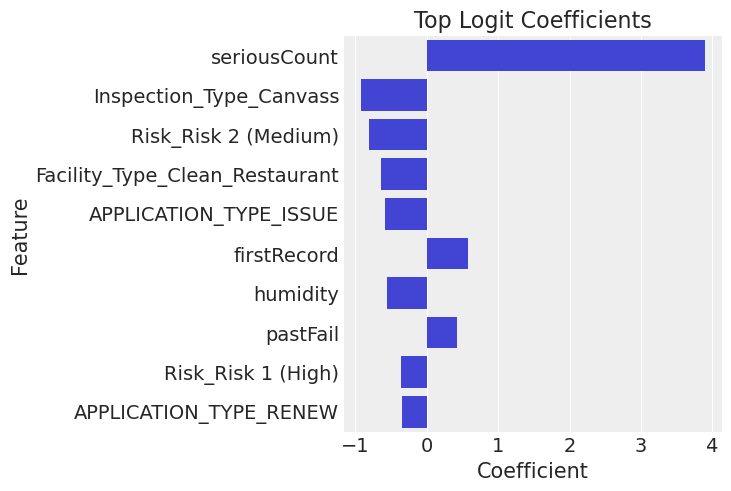

In [87]:
# plot 
sns.barplot(x="Coefficient", 
            y="Feature", 
            data=logit_data.nlargest(10, 'abs_coef')).set_title("Top Logit Coefficients")
plt.show()

### Random Forest

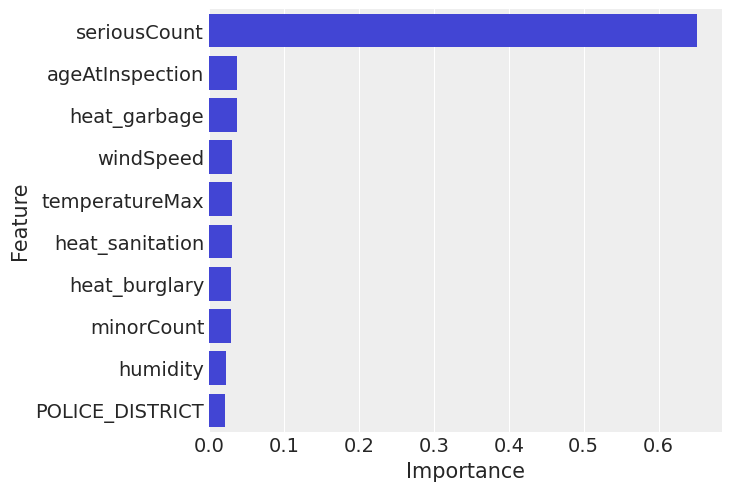

In [88]:
# fit the random forest on data to get feature importance
# ----------
rf_classifier.fit(X, y.ravel())

# import library
import seaborn as sns

# create feature importance dataframe
feat_importances = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(rf_classifier.feature_importances_))], axis = 1)
feat_importances.columns = ["Feature", "Importance"]

# plot 
sns.barplot(x = "Importance", 
            y = "Feature", 
            data = feat_importances.nlargest(10, 'Importance')) # identify the 10 most important features
plt.show()

### XGBoost

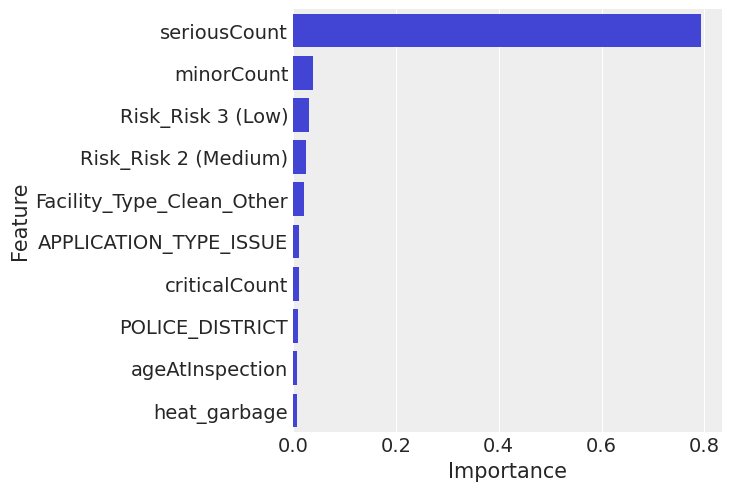

In [89]:
# fit the XGBoost model on data to get feature importance
# ----------
xgb_classifier.fit(X, y.ravel())

# import library
import seaborn as sns

# create feature importance dataframe
feat_importances = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(xgb_classifier.feature_importances_))], axis = 1)
feat_importances.columns = ["Feature", "Importance"]

# plot 
sns.barplot(x = "Importance", 
            y = "Feature", 
            data = feat_importances.nlargest(10, 'Importance')) # identify the 10 most important features
plt.show()

Across our three models, far and away the most influential feature is seriousCount, which I assume is a measure of how many serious violations they have. This makes sense. Other contributing features add much less to the model. The tree-based models look a little different, including features like minorCount and POLICE_DISTRICT. Facility type clearly seems to matter, and there seem to be some application features that are important. Several of these weather-y variables are included, which as mentioned above I'm not really sure what to make of. Age at inspection and past failures are also contributing, which makes sense.

I'm not sure there are any features I wish I could include, especially because I'm not certain what these features even mean. I guess it could be nice to have some marker of new ownership, as that's something that should be flagged becuase the data from the past will likely not be very predictive of how the place is run in the future. 

### Prioritize Audits

**Hint**: Look up the [`.predict()`](https://www.kite.com/python/docs/sklearn.linear_model.SGDRegressor.predict), [`.predict_proba()`](https://www.kite.com/python/docs/sklearn.linear_model.LogisticRegression.predict_proba), and [`.sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) methods. Then: 
1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities. 
2. Order your audits by their probability of detecting a "Fail" score
3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random


I'll go with XGBoost as I identified it as the best model for reducing false negatives.

In [195]:
#
# 1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities.
# -----------
xgb_pred = xgb_model.predict(X) # predicted class (0 = pass, 1 = fail)
xgb_probs = xgb_model.predict_proba(X) # predicted probability of being in class 0 and class 1

# Bind these vals to dataset with the "actual" y vals for later reference as well
X_all = X.copy()
X_all['pred']=xgb_pred # predicted class 
X_all['prob_0'] = xgb_probs[:, 0]  # First column of logit_probs (prob of 0)
X_all['prob_1'] = xgb_probs[:, 1]  # Second column of logit_probs (prob of 1)
X_all['actual'] = y # actual class

# Look at head to make sure worked alright
X_all.head()

,,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,POLICE_DISTRICT,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Risk_Risk 1 (High),Risk_Risk 2 (Medium),Risk_Risk 3 (Low),Inspection_Type_Canvass,Facility_Type_Clean_Other,Facility_Type_Clean_Restaurant,APPLICATION_TYPE_C_EXPA,APPLICATION_TYPE_C_LOC,APPLICATION_TYPE_ISSUE,APPLICATION_TYPE_RENEW,pred,prob_0,prob_1,actual
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
269961,SEVEN STAR,0,0,2,0,0,0,0,2.0,1,19.0,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0,False,False,True,True,True,False,False,False,False,True,0,0.989367,0.010633,0
507211,PANERA BREAD,0,0,3,0,0,0,0,2.0,1,24.0,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0,True,False,False,True,False,True,False,False,False,True,0,0.988792,0.011208,0
507212,LITTLE QUIAPO RESTAURANT,0,2,6,0,0,0,0,2.0,1,17.0,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0,True,False,False,True,False,True,False,False,False,True,1,0.098134,0.901866,1
507216,SERGIO'S TAQUERIA PIZZA INC.,0,0,6,0,0,0,0,2.0,1,17.0,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0,True,False,False,True,False,True,False,False,False,True,0,0.987016,0.012984,0
507219,TARGET STORE # T-2079,0,2,6,0,0,0,0,2.0,1,24.0,5.290411,0,0,1,0,0,1,0,0,0,0,0,0,0.009987,52.730000,16.266667,0.690000,9.530785,3.401567,2.126788,0,False,True,False,True,False,True,False,False,False,True,1,0.139198,0.860802,1


In [196]:
#
# 2. Order your audits by their probability of detecting a "Fail" score
# -----------
X_all_sorted = X_all.sort_values(by = 'prob_1', ascending = False)

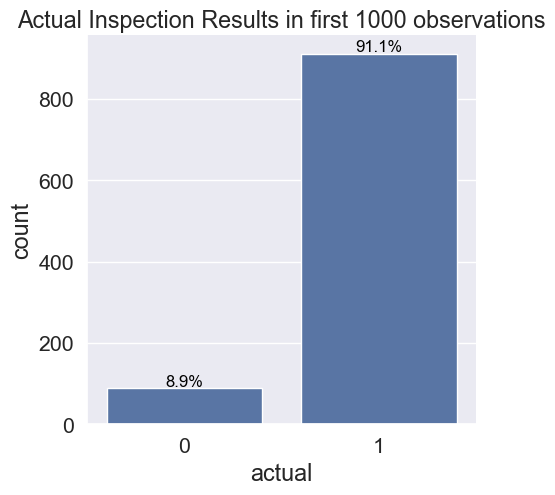

In [197]:
#
# 3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
# -----------

g = sns.catplot(data = X_all_sorted.iloc[:1000],
            x = "actual",
            kind = "count")

plt.title("Actual Inspection Results in first 1000 observations")
ax = g.ax  # Get the axes object of the plot
total = len(X_all_sorted.iloc[:1000])  # Total number of samples

# Loop over the patches (bars) and add the percentage label
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.show();

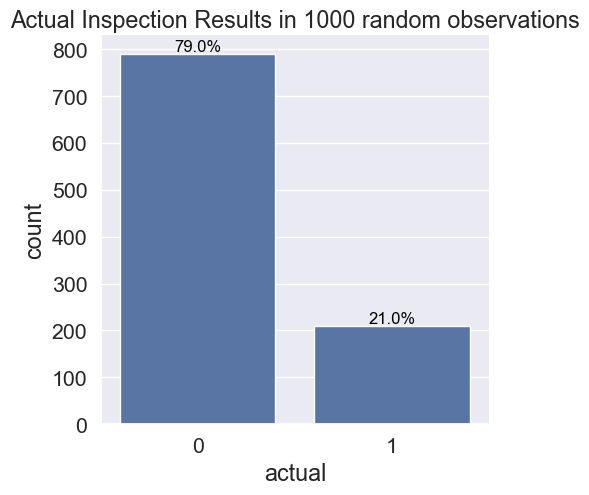

In [198]:
#
# 4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random
# -----------
g = sns.catplot(data = X_all_sorted.sample(n=1000),
            x = "actual",
            kind = "count")

plt.title("Actual Inspection Results in 1000 random observations")
ax = g.ax  # Get the axes object of the plot
total = len(X_all_sorted.iloc[:1000])  # Total number of samples

# Loop over the patches (bars) and add the percentage label
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.show();

The logit model clearly does a better job of selecting establishments for inspection than random sampling: Using the first 1,000 observations prioritized by the model, 91.1% of them actually recieved a fail rating. This is compared to only 21% of the randomly sampled subset.

### Predict on 2014 inspection data

Use your favorite model to make predictions based on the features using the "Chicago Inspection 2014_updated.csv" file. Treat this as you would a test dataset. This means you will have to format the features (including removing some features and getting dummies) and the label (binarize and recode) in the same way you did the training data. (Remember the "Results" column is your label). You will then compare your predictions with the actual.

In [183]:
# data processing
# -----------

# process features
X_test2014 = chicago_inspections_2014[chicago_inspections_2014.columns.intersection(chicago_inspections_2011_to_2013.columns)]
X_test2014=X_test2014.dropna().drop(columns = ['Facility_Type',
                                        'LICENSE_DESCRIPTION',
                                        'WARD_PRECINCT'])

# process target 
y_test2014 = X_test2014['Results']

# binarize outcome
y_test2014 = y_test2014.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y_test2014 = lb_style.fit_transform(y_test2014)
# recode 0s and 1s so 1s are "Fail"
y_test2014 = np.where(y_test2014 == 1, 0 ,1)

# final drops
X_test2014 = X_test2014.drop(columns = 'Results')
# get dummies
X_test2014 = pd.get_dummies(X_test2014)

In [184]:
# check head to make sure looks normal
X_test2014.head(5)

,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,POLICE_DISTRICT,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Risk_Risk 1 (High),Risk_Risk 2 (Medium),Risk_Risk 3 (Low),Inspection_Type_Canvass,Facility_Type_Clean_Other,Facility_Type_Clean_Restaurant,APPLICATION_TYPE_C_EXPA,APPLICATION_TYPE_C_LOC,APPLICATION_TYPE_ISSUE,APPLICATION_TYPE_RENEW
1,2,0,0,0,0,0,0,0.794521,0,4.0,1.432877,0,0,0,0,0,0,0,0,0,0,0,0,0.002300,28.16,6.020000,0.746667,12.034833,7.194320,1.219222,1,True,False,False,True,False,True,False,False,True,False
2,0,0,6,0,0,0,2,0.660274,0,4.0,9.931507,0,0,0,0,0,0,0,0,0,0,0,0,0.002300,28.16,6.020000,0.746667,26.292725,27.837325,12.401466,0,False,True,False,True,False,True,False,False,False,True
3,0,1,7,0,0,0,0,2.000000,1,3.0,11.013699,0,1,0,0,0,0,0,0,0,1,0,0,0.000433,25.30,7.653333,0.636667,49.468944,11.282325,66.467028,0,False,False,True,True,True,False,False,False,False,True
4,1,2,5,0,0,0,0,2.000000,1,3.0,1.408219,0,1,0,0,0,1,0,0,0,0,0,0,0.000433,25.30,7.653333,0.636667,69.939833,26.695701,76.827119,1,False,False,True,True,True,False,False,False,True,False
5,0,1,7,0,0,0,3,0.964384,0,3.0,3.304110,0,0,0,0,0,0,0,0,0,0,0,0,0.000433,25.30,7.653333,0.636667,69.662066,27.638311,78.175677,0,True,False,False,True,False,True,False,False,False,True


In [185]:
print(X_test2014.shape)
print(y_test2014.shape)

(3937, 41)
(3937, 1)


In [199]:
# predict and compare 
# -----------
# predict on the test data
y_pred = xgb_model.predict(X_test2014)

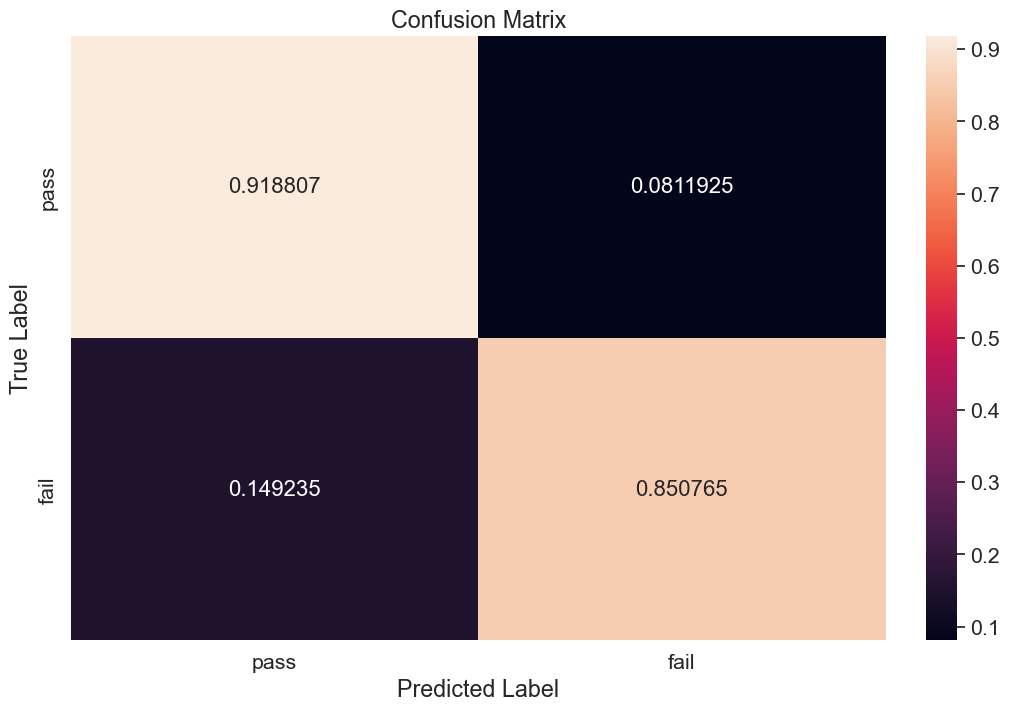

In [200]:
# compare predicted values to actual values using a confusion matrix
cf_matrix = confusion_matrix(y_test2014, 
                             y_pred, 
                             normalize = "true")

# convert to a dataframe
df_cm = pd.DataFrame(cf_matrix, range(2), range(2))

# set figure specifications
df_cm = df_cm.rename(index=str, columns={0: "pass", 1: "fail"})
df_cm.index = ["pass", "fail"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

# plot
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [202]:
# evaluate
# -----------
print("XGBoost:")
cross_val_metrics(xgb_model, X_test2014, y_test2014)

XGBoost:
Mean accuracy: 0.894
Mean precision: 0.831
Mean recall: 0.85
Mean F1: 0.839


So, based on our confusion matrix and the fit statistics generated above, the XGBoost is not doing as hot in the test set as it did during initial cross-validation. It's not awful but not as good as it was. Part of this could be due to the fact that what is predictive in the same year (2013 model validated on 2013 data) may not be predictive in the next year. There's bound to be some chnages (e.g., new ownership of a restaurant or correction of a previous issue) that affects accuracy in the following year.

## 5. Discussion Questions

1. Why do we need metrics beyond accuracy when using machine learning in the social sciences and public policy?


**YOUR ANSWER HERE**...

Accuracy is a useful metric for letting us get a sense for how often our model is correct overall. However, in cases like the one we looked at today, sometimes we care more about a certain *kind* of accuracy. For example, we may wish to maximize true positives or minimize false positives. In some cases different kind of errors will have much worse impacts on the policy problem or issue we're investigating. In today's exercise, I really wanted to minimize false negatives because the idea that a restaurant could have unsafe practices and not be investigated is more risky than the idea of investigating a restaurant that turned out to be fine.

2. Imagine that establishments learned about the algorithm being used to determine who gets audited and they started adjusting their behavior (and changing certain key features about themselves that were important for the prediction) to avoid detection. How could policymakers address this interplay between algorithmic decisionmaking and real world behavior?

**YOUR ANSWER HERE

It's likely that measurement will have an impact on behavior. Because of this, I would make two recommendations:
* Update the model on more recent training data occassionally to account for changes in behavior.
* Continue to randomly inspect a small subset of establishments. This is a method used in the Brazil city budget audits paper that is designed to keep a random component so nobody gets too lax or completely avoids inspection.

Ultimately, the factor that was most predictive of failing an inspection was number of severe violations. So if restaurants are moving to reduce the number of severe violations they have, that is exactly what we want them to do. Win-win!